<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 04: Movielens Dataset Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

## Imports

In [187]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import re
import matplotlib.pyplot as plt

## Read the files

In [188]:
movies = pd.read_csv("movies.dat", sep = "::", header = None, names = ["MovieID", "Title", "Genre"])

In [189]:
movies.head(3)

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [190]:
users = pd.read_csv("users.dat", sep = "::", header = None, names = ["UserID", "Gender", "Age", "Occupation", "ZipCode"])

In [191]:
users.head(3)

,UserID,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [192]:
ratings = pd.read_csv("ratings.dat", sep = "::", header = None, names = ["UserID", "MovieID", "Rating","Timestamp"])

In [193]:
ratings.head(3)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


### Dimensions of the data

In [194]:
movies.shape, users.shape, ratings.shape

((3883, 3), (6040, 5), (1000209, 4))

In [195]:
movies.columns, users.columns, ratings.columns

(Index(['MovieID', 'Title', 'Genre'], dtype='object'),
 Index(['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode'], dtype='object'),
 Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object'))

In [196]:
movies.info() 
users.info() 
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genre      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
ZipCode       6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


## Merging The 3 Datasets

In [197]:
movie_ratings = pd.merge(movies, ratings, on = "MovieID",)
movie_ratings.shape

(1000209, 6)

In [198]:
Master_Data = pd.merge(movie_ratings, users, on = "UserID")
Master_Data.shape

(1000209, 10)

In [199]:
Master_Data.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,ZipCode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [200]:
Master_Data.reset_index(inplace = True, drop=True)

## Randomised Final Dataset 

In [201]:
index = Master_Data.index

In [202]:
index = list(index)
index[:3]

[0, 1, 2]

In [203]:
ShuffleData = Master_Data.loc[index[:2000], :] #My System is lowend so I took 2000

In [204]:
RandomSample = Master_Data.sample(2000, random_state=3)

In [205]:
RandomSample.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,ZipCode
7961,1136,Monty Python and the Holy Grail (1974),Comedy,132,5,977427737,M,25,17,99709
270019,1431,Beverly Hills Ninja (1997),Action|Comedy,2907,3,972185287,F,35,5,12345
773462,2701,Wild Wild West (1999),Action|Sci-Fi|Western,4985,3,962593809,M,35,0,29063
600962,1186,"Sex, Lies, and Videotape (1989)",Drama,3093,3,969650571,F,45,20,89134
384987,2320,Apt Pupil (1998),Drama|Thriller,3970,5,965663572,F,25,2,02903


### Cleaning the RandomSample

In [206]:
Rand = RandomSample.drop(columns=['Timestamp'])
Rand.head()

,MovieID,Title,Genre,UserID,Rating,Gender,Age,Occupation,ZipCode
7961,1136,Monty Python and the Holy Grail (1974),Comedy,132,5,M,25,17,99709
270019,1431,Beverly Hills Ninja (1997),Action|Comedy,2907,3,F,35,5,12345
773462,2701,Wild Wild West (1999),Action|Sci-Fi|Western,4985,3,M,35,0,29063
600962,1186,"Sex, Lies, and Videotape (1989)",Drama,3093,3,F,45,20,89134
384987,2320,Apt Pupil (1998),Drama|Thriller,3970,5,F,25,2,02903


## Visualizing Age Distribution

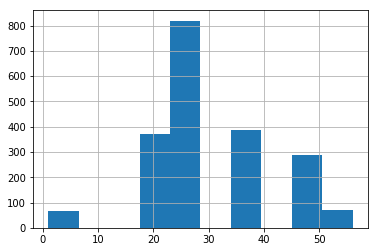

In [207]:
Rand.Age.hist()

In [208]:
Rand.corr()

,MovieID,UserID,Rating,Age,Occupation
MovieID,1.000000,-0.022676,-0.047902,-0.008736,-0.009815
UserID,-0.022676,1.000000,0.016120,0.044012,-0.040724
Rating,-0.047902,0.016120,1.000000,-0.002479,-0.003186
Age,-0.008736,0.044012,-0.002479,1.000000,0.028341
Occupation,-0.009815,-0.040724,-0.003186,0.028341,1.000000


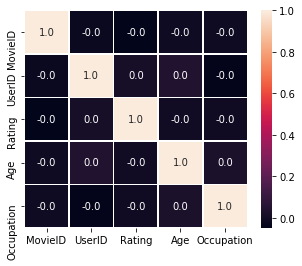

In [209]:
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(Rand.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Toy Story Movie Rating

In [210]:
title = Rand.iloc[0].Title
title

'Monty Python and the Holy Grail (1974)'

In [211]:
re.search("Toy Story", title)!=None

False

In [212]:
def fn(t):
    return re.search("Toy Story".lower(), t.lower())!=None

In [213]:
fn(title)

False

In [214]:
Rand["Title"].apply(fn)

7961      False
270019    False
773462    False
600962    False
384987    False
44099     False
969436    False
119264    False
371203    False
208749    False
207102    False
978165    False
323066    False
395384    False
529813    False
961844    False
773135    False
140131    False
318007    False
452271    False
914794    False
340220    False
292916    False
778523    False
756850    False
787130    False
556191    False
388475    False
123989    False
181794    False
          ...  
105865    False
976634    False
124641    False
108212    False
667289    False
437159    False
693252    False
531806    False
724706    False
337067    False
403206    False
964812    False
613376    False
640290    False
84365     False
592739    False
140802    False
464040    False
833053    False
773237    False
828137    False
299125    False
76286     False
108858    False
900943    False
488946    False
165682    False
400298    False
926907    False
623495    False
Name: Title, Length: 200

In [215]:
toystory = Rand[Rand["Title"].apply(fn)]
toystory.head()

,MovieID,Title,Genre,UserID,Rating,Gender,Age,Occupation,ZipCode
457953,1,Toy Story (1995),Animation|Children's|Comedy,4718,5,M,35,7,03885
425794,1,Toy Story (1995),Animation|Children's|Comedy,4379,4,M,25,4,27278
740676,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5561,5,F,25,3,74075


In [216]:
toystory.mean(axis=0)

MovieID       1.038667e+03
UserID        4.886000e+03
Rating        4.666667e+00
Age           2.833333e+01
Occupation    4.666667e+00
ZipCode       1.295091e+13
dtype: float64

In [217]:
print("Median of Rating:", toystory['Rating'].median())
print("Median of Age:", toystory['Age'].median())
print("Median of occupation:", toystory['Occupation'].median())

Median of Rating: 5.0
Median of Age: 25.0
Median of occupation: 4.0


In [218]:
print("Mode of Rating:", toystory['Rating'].mode())
print("Mode of Age:", toystory['Age'].mode())
print("Mode of occupation:", toystory['Occupation'].mode())
print("Mode of Movie_name:", toystory['Title'].mode())

Mode of Rating: 0    5
dtype: int64
Mode of Age: 0    25
dtype: int64
Mode of occupation: 0    3
1    4
2    7
dtype: int64
Mode of Movie_name: 0    Toy Story (1995)
dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F237618D0>,
      dtype=object)

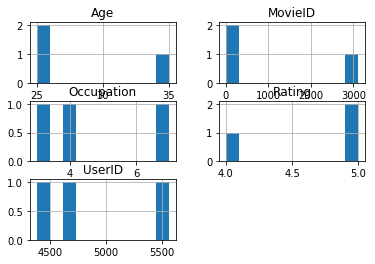

In [219]:
toystory.hist()

## Top 25 Movies 

In [220]:
Top25=RandomSample.groupby(["MovieID", "Title"]).Timestamp.count().sort_values(ascending = False)[:25]
Top25

MovieID  Title                                                                      
2115     Indiana Jones and the Temple of Doom (1984)                                    9
260      Star Wars: Episode IV - A New Hope (1977)                                      9
1580     Men in Black (1997)                                                            8
750      Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)    8
912      Casablanca (1942)                                                              7
593      Silence of the Lambs, The (1991)                                               7
1270     Back to the Future (1985)                                                      7
1097     E.T. the Extra-Terrestrial (1982)                                              7
608      Fargo (1996)                                                                   7
2012     Back to the Future Part III (1990)                                             7
2321     Pleasa

## Ratings of Movies With UserID=2696

In [221]:
#MasterData had to be used as the RandomSample and Rand did'nt have the userID=2696 
Master_Data.loc[Master_Data.UserID==2696, "Rating"]

991035    3
991036    5
991037    4
991038    3
991039    4
991040    2
991041    3
991042    4
991043    4
991044    2
991045    4
991046    4
991047    4
991048    4
991049    4
991050    2
991051    4
991052    1
991053    4
991054    1
Name: Rating, dtype: int64

## Feature Engineering

In [222]:
RandomSample.Genre.head()

7961                     Comedy
270019            Action|Comedy
773462    Action|Sci-Fi|Western
600962                    Drama
384987           Drama|Thriller
Name: Genre, dtype: object

In [223]:
RandomSample.Genre=RandomSample.Genre.str.split("|")
RandomSample.Genre.head()

7961                       [Comedy]
270019             [Action, Comedy]
773462    [Action, Sci-Fi, Western]
600962                      [Drama]
384987            [Drama, Thriller]
Name: Genre, dtype: object

In [224]:
x = []
for rn in range(len(RandomSample)):
    x = x+RandomSample.iloc[rn].Genre

In [225]:
UniqueGenre = list(set(x))
print(UniqueGenre)

['War', "Children's", 'Adventure', 'Crime', 'Musical', 'Fantasy', 'Horror', 'Western', 'Drama', 'Thriller', 'Mystery', 'Action', 'Documentary', 'Romance', 'Comedy', 'Animation', 'Sci-Fi', 'Film-Noir']


In [226]:
UniqueGenre = pd.Series(UniqueGenre)

In [227]:
row = RandomSample.Genre.iloc[0]
row

['Comedy']

In [228]:
len(UniqueGenre)

18

In [229]:
UniqueGenre.isin(row)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17    False
dtype: bool

In [230]:
df = pd.DataFrame()
for row in RandomSample.Genre:
    a = UniqueGenre.isin(row) 
    df = df.append(a, ignore_index = True)
df[:4]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [231]:
df.columns = UniqueGenre
df.head(4)

,War,Children's,Adventure,Crime,Musical,Fantasy,Horror,Western,Drama,Thriller,Mystery,Action,Documentary,Romance,Comedy,Animation,Sci-Fi,Film-Noir
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [232]:
RandomSample.head(3)

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,ZipCode
7961,1136,Monty Python and the Holy Grail (1974),[Comedy],132,5,977427737,M,25,17,99709
270019,1431,Beverly Hills Ninja (1997),"[Action, Comedy]",2907,3,972185287,F,35,5,12345
773462,2701,Wild Wild West (1999),"[Action, Sci-Fi, Western]",4985,3,962593809,M,35,0,29063


In [233]:
df.head(3)

,War,Children's,Adventure,Crime,Musical,Fantasy,Horror,Western,Drama,Thriller,Mystery,Action,Documentary,Romance,Comedy,Animation,Sci-Fi,Film-Noir
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [234]:
RandomSample.reset_index(inplace=True)

In [235]:
RandomSample.drop("index", axis=1, inplace = True)

In [236]:
RandomSample = pd.concat((RandomSample, df), axis = 1)

In [237]:
RandomSample.head(3)

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,ZipCode,...,Drama,Thriller,Mystery,Action,Documentary,Romance,Comedy,Animation,Sci-Fi,Film-Noir
0,1136,Monty Python and the Holy Grail (1974),[Comedy],132,5,977427737,M,25,17,99709,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1431,Beverly Hills Ninja (1997),"[Action, Comedy]",2907,3,972185287,F,35,5,12345,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2701,Wild Wild West (1999),"[Action, Sci-Fi, Western]",4985,3,962593809,M,35,0,29063,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [238]:
RandomSample.Occupation.value_counts()

0     271
4     260
1     196
7     196
17    142
12    114
20    113
14    107
2      98
16     83
6      75
3      65
10     52
11     47
5      46
15     41
19     29
9      24
18     20
13     19
8       2
Name: Occupation, dtype: int64

In [239]:
RandomSample.columns

Index(['MovieID', 'Title', 'Genre', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'ZipCode', 'War', 'Children's', 'Adventure',
       'Crime', 'Musical', 'Fantasy', 'Horror', 'Western', 'Drama', 'Thriller',
       'Mystery', 'Action', 'Documentary', 'Romance', 'Comedy', 'Animation',
       'Sci-Fi', 'Film-Noir'],
      dtype='object')

In [240]:
FinalData = RandomSample.drop(["MovieID", "Title", "Genre", "UserID", "Timestamp", "ZipCode"], axis = 1)
FinalData.head()

,Rating,Gender,Age,Occupation,War,Children's,Adventure,Crime,Musical,Fantasy,...,Drama,Thriller,Mystery,Action,Documentary,Romance,Comedy,Animation,Sci-Fi,Film-Noir
0,5,M,25,17,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,F,35,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,M,35,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,F,45,20,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,F,25,2,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine Learning

## Imports

In [241]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

In [242]:
FinalData.describe()

,Rating,Age,Occupation,War,Children's,Adventure,Crime,Musical,Fantasy,Horror,...,Drama,Thriller,Mystery,Action,Documentary,Romance,Comedy,Animation,Sci-Fi,Film-Noir
count,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.55650,29.15050,7.794500,0.063000,0.075500,0.127000,0.085500,0.04550,0.037000,0.080500,...,0.354000,0.190500,0.042500,0.246000,0.008500,0.148000,0.373000,0.042000,0.145000,0.015500
std,1.11778,11.64653,6.501492,0.243024,0.264262,0.333056,0.279694,0.20845,0.188809,0.272134,...,0.478329,0.392794,0.201777,0.430786,0.091826,0.355189,0.483723,0.200639,0.352189,0.123561
min,1.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.00000,25.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.00000,25.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.00000,35.00000,14.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.00000,56.00000,20.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Label Encoding Gender Column

In [243]:
le = LabelEncoder() 
sex = le.fit_transform(FinalData['Gender'])
sex

array([1, 0, 1, ..., 1, 0, 1])

In [244]:
FD = FinalData.drop(['Gender'], axis=1)
FD['Gender'] = sex
FD.head(3)

,Rating,Age,Occupation,War,Children's,Adventure,Crime,Musical,Fantasy,Horror,...,Thriller,Mystery,Action,Documentary,Romance,Comedy,Animation,Sci-Fi,Film-Noir,Gender
0,5,25,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,3,35,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,3,35,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [245]:
FD.describe()

,Rating,Age,Occupation,War,Children's,Adventure,Crime,Musical,Fantasy,Horror,...,Thriller,Mystery,Action,Documentary,Romance,Comedy,Animation,Sci-Fi,Film-Noir,Gender
count,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.55650,29.15050,7.794500,0.063000,0.075500,0.127000,0.085500,0.04550,0.037000,0.080500,...,0.190500,0.042500,0.246000,0.008500,0.148000,0.373000,0.042000,0.145000,0.015500,0.750500
std,1.11778,11.64653,6.501492,0.243024,0.264262,0.333056,0.279694,0.20845,0.188809,0.272134,...,0.392794,0.201777,0.430786,0.091826,0.355189,0.483723,0.200639,0.352189,0.123561,0.432832
min,1.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.00000,25.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.00000,25.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.00000,35.00000,14.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.00000,56.00000,20.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [246]:
FD.shape

(2000, 22)

In [247]:
FD.corr()

,Rating,Age,Occupation,War,Children's,Adventure,Crime,Musical,Fantasy,Horror,...,Thriller,Mystery,Action,Documentary,Romance,Comedy,Animation,Sci-Fi,Film-Noir,Gender
Rating,1.000000,-0.002479,-0.003186,0.099224,-0.047472,-0.069002,0.038144,0.020093,-0.021762,-0.078275,...,-0.025096,0.032599,-0.070435,0.075736,0.014208,-0.053799,0.013950,-0.009384,0.086017,-0.017895
Age,-0.002479,1.000000,0.028341,0.063104,-0.075698,0.010417,-0.017927,0.015517,-0.019823,-0.010769,...,-0.003755,0.013881,-0.004591,0.010497,0.022185,-0.039272,-0.074851,-0.011055,0.001507,0.005071
Occupation,-0.003186,0.028341,1.000000,0.003449,0.009035,0.043709,-0.005738,0.017607,0.024536,0.023492,...,0.015337,-0.040624,0.023774,0.009631,0.028124,0.014205,0.027712,0.013894,-0.019696,0.139452
War,0.099224,0.063104,0.003449,1.000000,-0.058522,0.006168,-0.079285,-0.026988,-0.039924,-0.076722,...,-0.110067,-0.054629,0.129034,-0.024008,0.088970,-0.140420,-0.033774,0.045180,-0.032536,0.059147
Children's,-0.047472,-0.075698,0.009035,-0.058522,1.000000,0.061515,-0.087380,0.300860,0.244766,-0.077599,...,-0.133811,-0.060207,-0.145654,-0.026460,-0.081798,0.088744,0.572300,-0.010186,-0.035857,-0.010171
Adventure,-0.069002,0.010417,0.043709,0.006168,0.061515,1.000000,-0.057552,-0.032836,0.251398,-0.046622,...,-0.028247,-0.043137,0.423683,-0.035315,-0.027876,-0.123402,0.017458,0.286464,-0.023546,0.074168
Crime,0.038144,-0.017927,-0.005738,-0.079285,-0.087380,-0.057552,1.000000,-0.066759,-0.040989,-0.044465,...,0.152196,0.068541,0.103522,-0.028311,-0.087155,-0.073147,-0.064023,-0.085292,0.106385,0.027539
Musical,0.020093,0.015517,0.017607,-0.026988,0.300860,-0.032836,-0.066759,1.000000,-0.042796,-0.046964,...,-0.105915,-0.045998,-0.102426,-0.020215,0.044134,0.015166,0.348999,-0.069470,-0.027395,-0.040450
Fantasy,-0.021762,-0.019823,0.024536,-0.039924,0.244766,0.251398,-0.040989,-0.042796,1.000000,-0.057998,...,-0.081598,-0.041296,0.054099,-0.018149,-0.029480,-0.019729,-0.001426,0.160013,-0.024595,-0.003287
Horror,-0.078275,-0.010769,0.023492,-0.076722,-0.077599,-0.046622,-0.044465,-0.046964,-0.057998,1.000000,...,0.057701,-0.016786,-0.053792,-0.027396,-0.092267,-0.099007,-0.043629,0.013858,-0.037126,0.043190


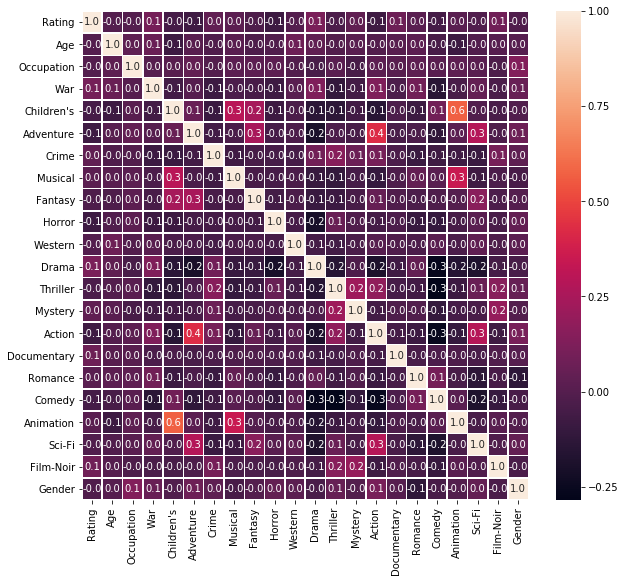

In [248]:
f,ax = plt.subplots(figsize=(10, 9))
sns.heatmap(FD.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Logistic Regression

In [249]:
y = FD.Rating
X = FD.iloc[:, 1:]

In [250]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.5,random_state=0)

In [251]:
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [252]:
y_pred = logreg.predict(X_test)

In [253]:
logreg.score(X_test,y_test)

0.35

## Linear Regression

In [254]:
model = LinearRegression() 
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [255]:
model.coef_

array([-0.00516018, -0.00139043,  0.60000402, -0.27125246,  0.0292123 ,
        0.06868244,  0.2041899 ,  0.02705845, -0.30483956,  0.01993722,
        0.09780365,  0.10249516,  0.28539511, -0.30450955,  1.1401683 ,
       -0.1208065 , -0.12525395,  0.33297581, -0.03256982,  0.47541367,
        0.01102295])

In [256]:
model.intercept_

3.7705201470487326

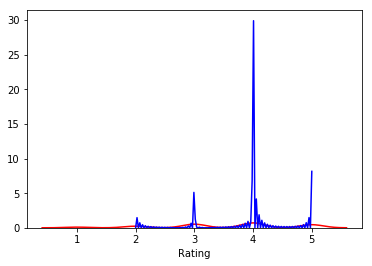

In [257]:
sns.distplot(y_train, hist=False,color='r') 
sns.distplot(y_pred, hist=False,color='b')